# Global Well-Being Prediction from the World Happiness Report
## Objective
This project analyzes and predict global happiness scores and direction (increase or decrease) over year by examining socioeconomic and psychological factors such as GDP per capita, social support, health, freedom, generosity, and corruption. It aims to identify key drivers of happiness and uncover patterns in well-being, providing insights for policymakers and organizations to enhance societal well-being and quality of life.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('World Happiness Report Dataset.csv')
df.head()

,Country,Region,Year,Log GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
0,Afghanistan,South Asia,2008,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,3.724
1,Afghanistan,South Asia,2009,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,4.402
2,Afghanistan,South Asia,2010,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,4.758
3,Afghanistan,South Asia,2011,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,3.832
4,Afghanistan,South Asia,2012,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,3.783


In [315]:
df.shape

(2506, 12)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2506 non-null   object 
 1   Region                        2506 non-null   object 
 2   Year                          2506 non-null   int64  
 3   Log GDP per capita            2478 non-null   float64
 4   Social Support                2490 non-null   float64
 5   Healthy Life Expectancy       2440 non-null   float64
 6   Freedom to Make Life Choices  2467 non-null   float64
 7   Generosity                    2422 non-null   float64
 8   Perceptions of Corruption     2378 non-null   float64
 9   Positive Affect               2339 non-null   float64
 10  Negative Affect               2347 non-null   float64
 11  Life Ladder Score             2506 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 235.1+ KB


#### Summary Statistics

In [332]:
df.drop(columns='Year').describe().round(2)

,Log GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
count,2478.00,2490.00,2440.00,2467.00,2422.00,2378.00,2339.00,2347.00,2506.00
mean,9.18,0.83,59.79,0.74,0.01,0.71,0.65,0.27,5.49
std,1.46,0.16,16.06,0.14,0.16,0.23,0.11,0.09,1.13
min,1.72,0.00,0.00,0.00,-0.34,0.00,0.18,0.08,1.28
25%,8.31,0.75,57.30,0.65,-0.11,0.65,0.57,0.21,4.65
50%,9.43,0.84,64.68,0.76,-0.01,0.79,0.66,0.26,5.46
75%,10.34,0.91,68.23,0.86,0.11,0.86,0.74,0.33,6.33
max,11.68,1.62,74.60,0.98,0.70,0.98,0.88,0.70,8.02


#### Checking Missing Values

In [294]:
null_count = df.isnull().sum()
null_count[null_count > 0]

Log GDP per capita               28
Social Support                   16
Healthy Life Expectancy          66
Freedom to Make Life Choices     39
Generosity                       84
Perceptions of Corruption       128
Positive Affect                 167
Negative Affect                 159
dtype: int64

- From the above `info()` and `isnull()`, we can see there are some missing values in our dataset.

- This can be addressed via imputation techniques and regression models.

#### Identifying Duplicates

In [326]:
df[df.duplicated()]

,Country,Region,Year,Log GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score


- The dataset contains 0 duplicate values.

#### Distribution of Categorical Features

In [292]:
for col in ['Country', 'Region', 'Year']:
    print(f'Unique {col} : {df[col].nunique()} \n\n{df[col].unique()}\n')

Unique Country : 166 

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 '

- The dataset covers 11 regions across 166 countries for the years 2005 to 2024.

In [135]:
region_shortnames = {
    'South Asia': 'S. Asia',
    'Central and Eastern Europe': 'C. & E. Europe',
    'Middle East and North Africa': 'M. East & N. Africa',
    'Latin America and Caribbean': 'Latin America',
    'Commonwealth of Independent States': 'CIS',
    'ANZ': 'ANZ',
    'Western Europe': 'W. Europe',
    'Sub-Saharan Africa': 'Sub-Saharan Africa',
    'Southeast Asia': 'S. East Asia',
    'North America': 'N. America',
    'East Asia': 'E. Asia'
}
df['Region'] = df['Region'].apply(lambda x : region_shortnames.get(x))

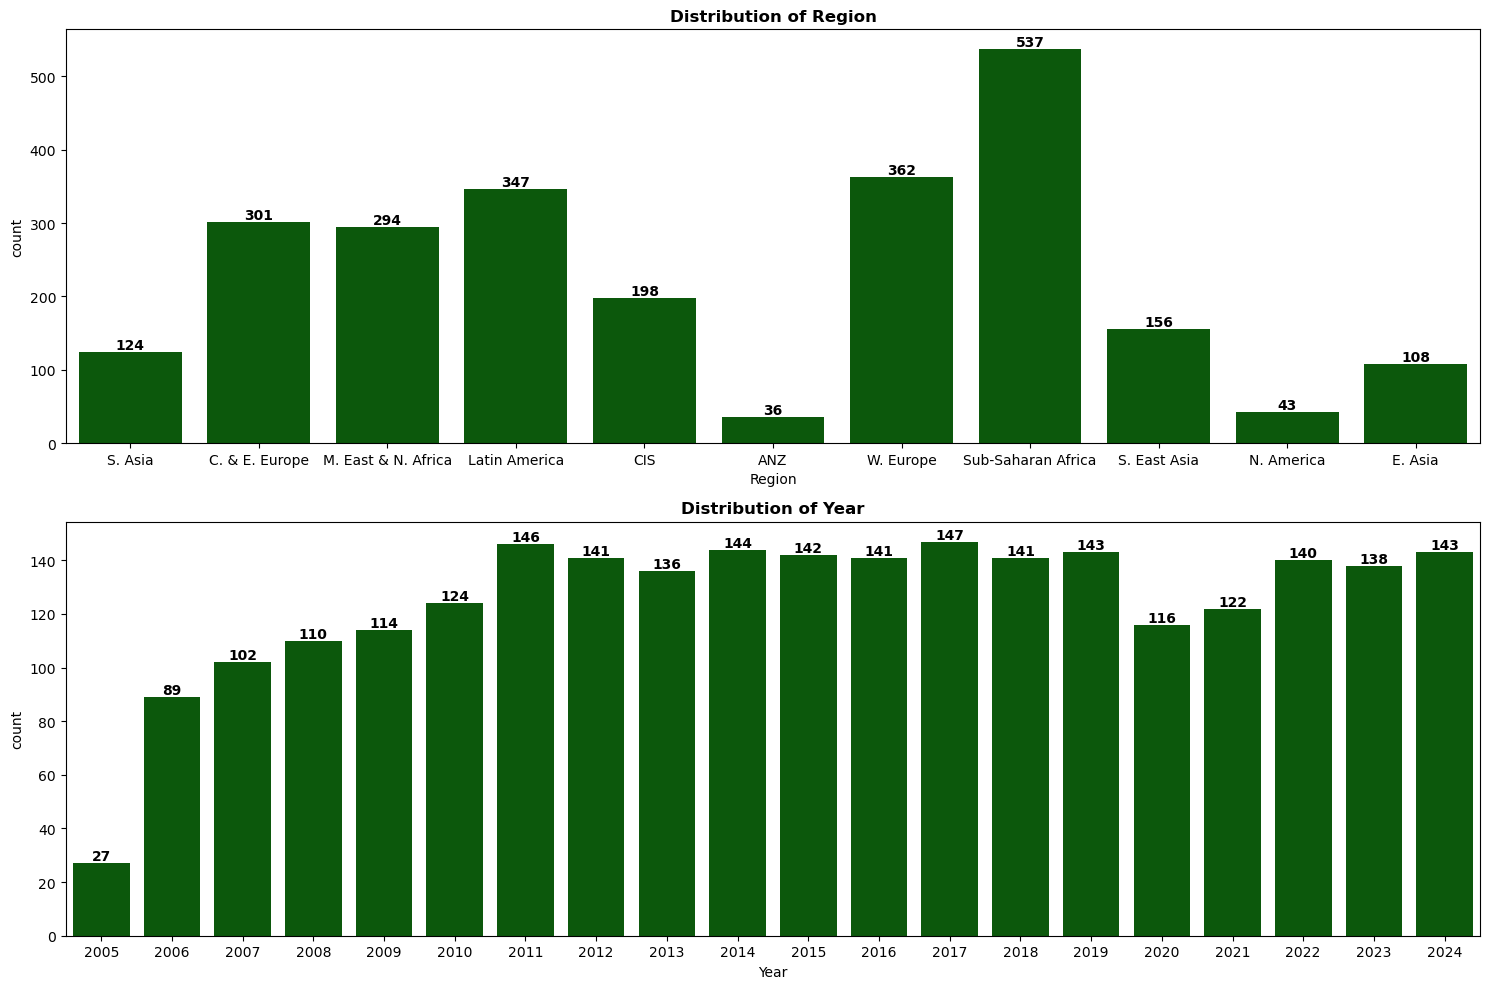

In [181]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
axes = axes.flatten()

for col, axis in zip(['Region', 'Year'], axes):
    ax = sns.countplot(data=df, x=col, color='darkgreen', ax=axis)
    ax.bar_label(ax.containers[0], fontweight='bold', fontsize=10)
    axis.set_title(f'Distribution of {col}', fontweight='bold')

plt.tight_layout()

- Countries from `Sub-Saharan Africa` dominate.
  
- The distribution of years shows that we don't have data for all countries in every year.

#### Distribution of numerical Features using both histograms and boxplots

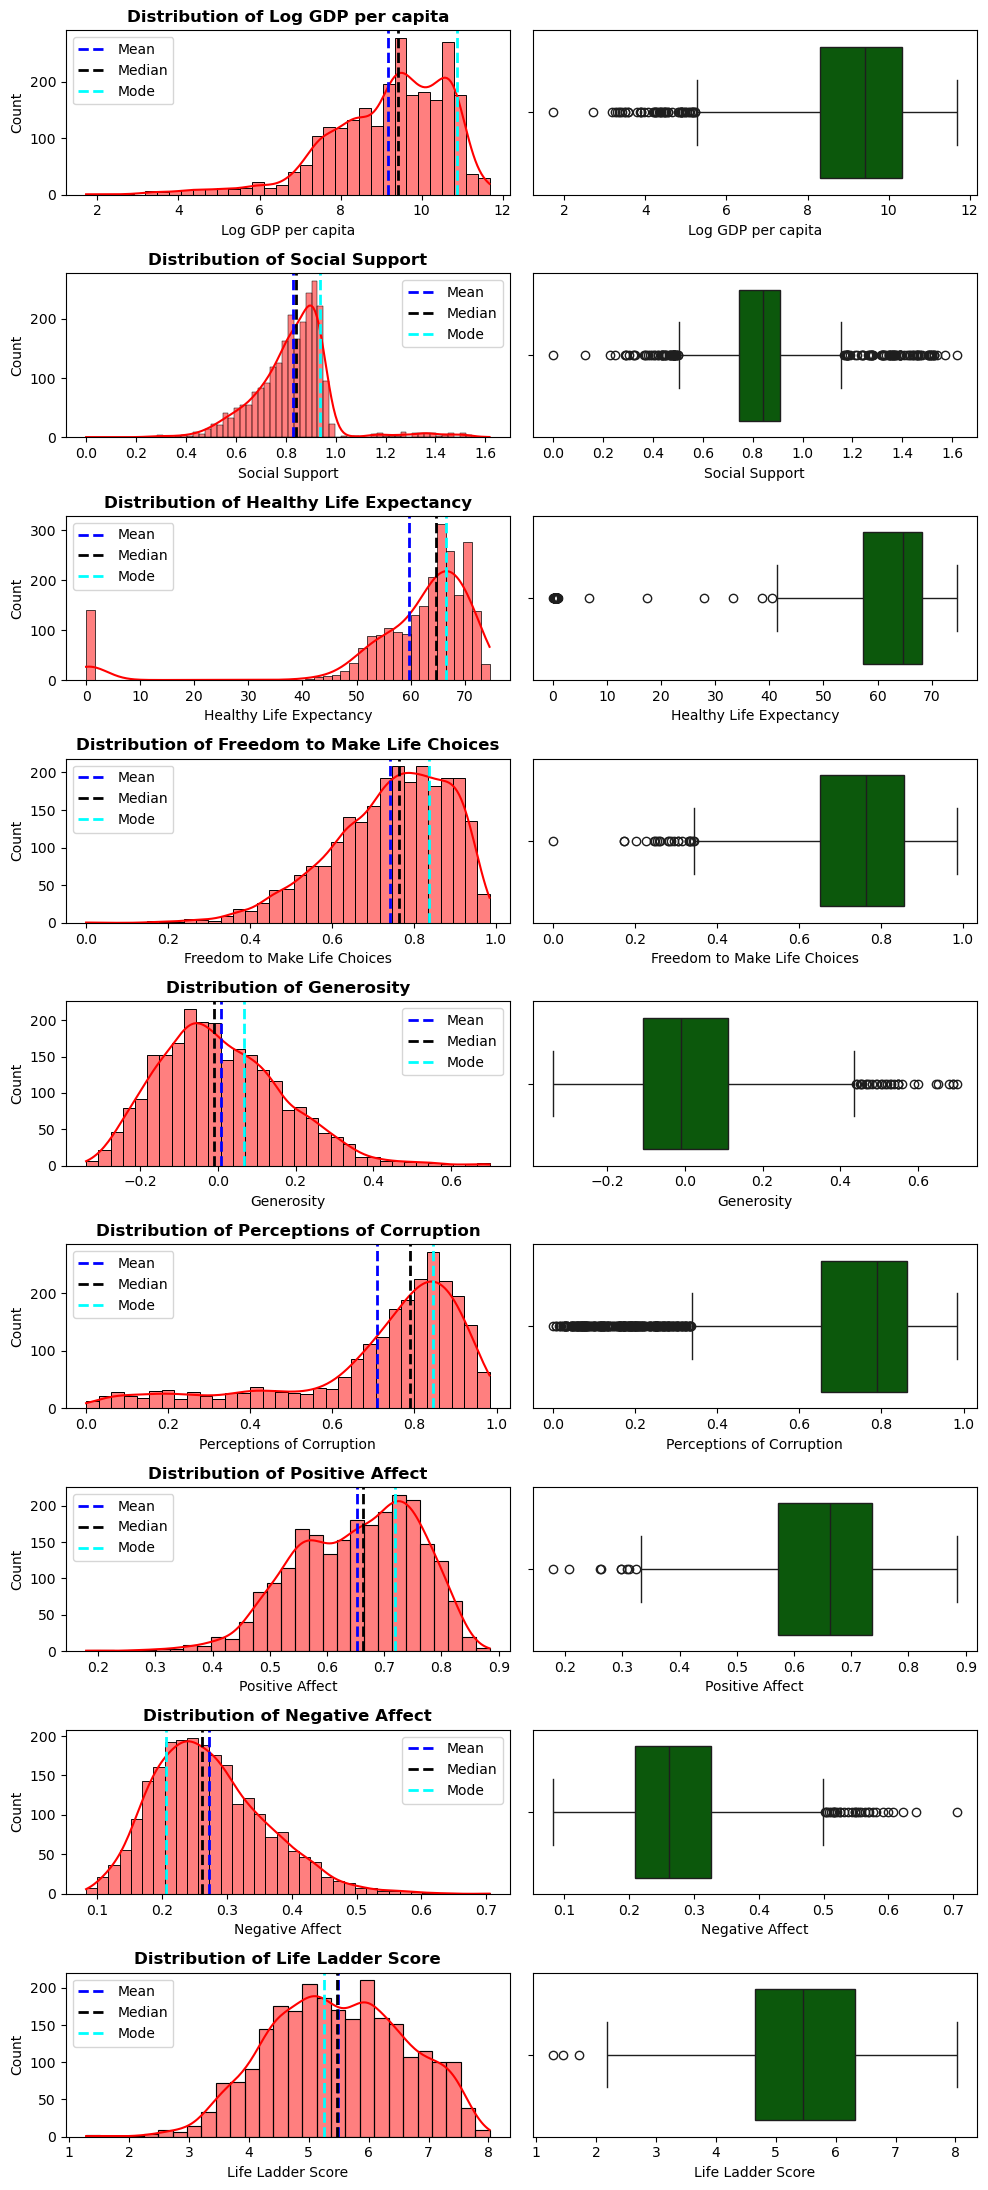

In [11]:
numerical_cols = df.drop(columns='Year').select_dtypes(exclude='O').columns.to_list()
fig, axes = plt.subplots(9, 2, figsize=(10, 22))

for i, col in enumerate(numerical_cols):

    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='red')
    axes[i, 0].axvline(x=df[col].mean(), color='blue', linewidth=2, linestyle="--", label='Mean')
    axes[i, 0].axvline(x=df[col].median(), color='black', linewidth=2, linestyle="--", label='Median')
    axes[i, 0].axvline(x=df[col].mode()[0], color='cyan', linewidth=2, linestyle="--", label='Mode')
    axes[i, 0].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i, 0].legend()

    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='darkgreen')

plt.tight_layout()

#### Skewness Analysis

In [91]:
df[numerical_cols].skew()

Log GDP per capita             -1.066500
Social Support                  0.651837
Healthy Life Expectancy        -2.841862
Freedom to Make Life Choices   -0.763516
Generosity                      0.647791
Perceptions of Corruption      -1.409724
Positive Affect                -0.458936
Negative Affect                 0.698077
Life Ladder Score              -0.082574
dtype: float64

- Outliers and high skewness have been identified in the distribution of numerical columns. Despite this, it has been decided to keep them in the analysis as they may indicate the existence of extraordinary situations in the country.

#### Relationships Between Numerical Features

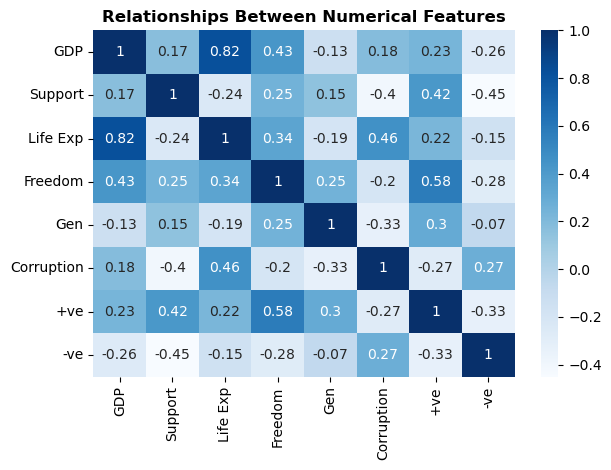

In [163]:
sns.heatmap(df.drop(columns=['Country', 'Region', 'Year', 'Life Ladder Score']).corr().round(2), 
            cmap='Blues', annot=True, 
            xticklabels=['GDP', 'Support', 'Life Exp', 'Freedom', 'Gen', 'Corruption', '+ve', '-ve'],
            yticklabels=['GDP', 'Support', 'Life Exp', 'Freedom', 'Gen', 'Corruption', '+ve', '-ve']
           )
plt.title('Relationships Between Numerical Features', fontweight='bold')
plt.tight_layout()

- The heatmap shows,
    - Healthy positive correlation between `Life Expectancy` and `GDP`.
    - Mild positive correaltion between `GDP` and `Freedom to Make Choices`, `Social Support` and `Positive Affect`, `Life Expectancy` and `Corruption`, `Freedom to Make Choice` and `Postive Impact`.